# Libraries


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from frameExtraction import FrameExtraction
from heatmapGeneration import HeatmapGeneration
from masks import Mask
from PIL import Image
import torch
import FILE_PATHS

# Paths


In [2]:
videos_csv = f"{FILE_PATHS.ECHONET}/VolumeTracings.csv"
images_csv = f"{FILE_PATHS.ECHONET}/images_info.csv"
videos_path = FILE_PATHS.VIDEOS
train_path = FILE_PATHS.TRAIN
validation_path = FILE_PATHS.VALIDATION

In [3]:
f'{FILE_PATHS.ECHONET}/images_info.csv'

'../EchoNet-Dynamic/images_info.csv'

In [18]:
images_path,masks_path, heatmaps_path  = FILE_PATHS.split('validation')

## Create data directories

In [19]:
folders = [
    videos_path,
    images_path,
    masks_path,
    f"{heatmaps_path}/gaussian",
    f"{heatmaps_path}/euclidean",
]

for folder in folders:
    if not os.path.exists(folder):
        os.makedirs(folder)

# Save labeled frames


In [20]:
def show_image_from_path(path):
    plt.imshow(np.asarray(Image.open(path)))
    plt.tight_layout()
    plt.axis("off")
    plt.show()

In [21]:
video_info = pd.read_csv(videos_csv)
video_info.head()

,FileName,X1,Y1,X2,Y2,Frame
0,0X100009310A3BD7FC.avi,51.260417,15.348958,64.932292,69.125000,46
1,0X100009310A3BD7FC.avi,50.037611,17.167841,53.367222,16.321330,46
2,0X100009310A3BD7FC.avi,49.157378,20.407629,57.090549,18.390722,46
3,0X100009310A3BD7FC.avi,48.538173,23.581055,59.997339,20.667707,46
4,0X100009310A3BD7FC.avi,47.918968,26.754480,62.904129,22.944693,46


The FrameExtraction class simply extracts specific frames based on 'VolumeTracings.cvs' and save a .csv with all the landmarks or an specific number of them, it depends of 'num_landmarks' param.


In [22]:
extraction = FrameExtraction(video_info=video_info, path_save = images_path)
extraction.save_images(num_landmarks=5)

¡Extraction Done!
Path images:  ../EchoNet-Dynamic/data/validation/images
Path df:  ../EchoNet-Dynamic/images_info.csv


In [23]:
frame_info = pd.read_csv(images_csv)
frame_info.head()

,File,X,Y
0,0X100009310A3BD7FC_46.jpeg,51,15
1,0X100009310A3BD7FC_46.jpeg,79,67
2,0X100009310A3BD7FC_46.jpeg,49,44
3,0X100009310A3BD7FC_46.jpeg,64,69
4,0X100009310A3BD7FC_46.jpeg,75,37


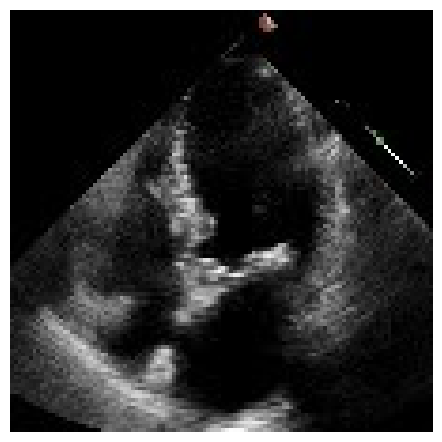

In [24]:
sample_image = f"{images_path}/{os.listdir(images_path)[0]}"
show_image_from_path(sample_image)

# Get Masks


In [25]:
files = os.listdir(images_path)

mask = Mask(
    file_info=frame_info,
    MASK_DIR = masks_path,
    amount_of_frames=2,
    images_files_array=files,
    files_path=images_path,
)

# mask.generate_masks(action="show")
mask.generate_masks(action="save")

IMAGE SAVING DONE!


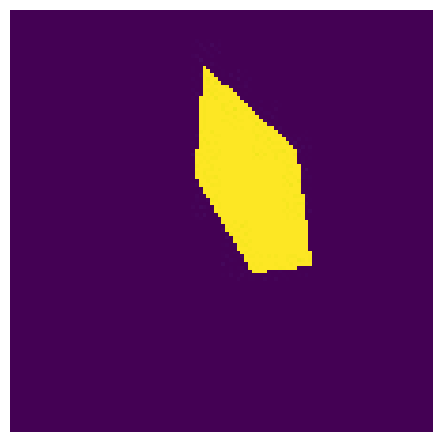

In [26]:
sample_mask = f"{masks_path}/{os.listdir(masks_path)[0]}"
show_image_from_path(sample_mask)

# Heatmap Generation


In [27]:
heatmap = HeatmapGeneration(frame_info=frame_info, path_masks=masks_path, path_tensors=heatmaps_path)
heatmap.heatmap(distribution="Gaussian")

In [28]:
heatmap.heatmap(distribution="Euclidean")

In [29]:
def show_n_channel_image_tensor(tensor):
    complete_image = tensor[0]
    for channel in tensor[1:]:
        complete_image += channel
    plt.imshow(complete_image)
    plt.tight_layout()
    plt.axis("off")
    plt.show()

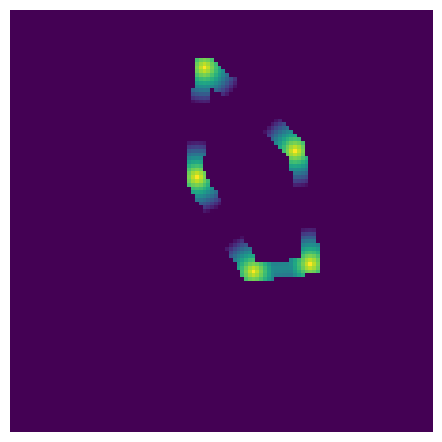

In [30]:
sample_euclidean_path = (
    f"{heatmaps_path}/euclidean/{os.listdir(f'{heatmaps_path}/euclidean')[0]}"
)
sample_euclidean_heatmap = torch.load(sample_euclidean_path)
show_n_channel_image_tensor(sample_euclidean_heatmap)

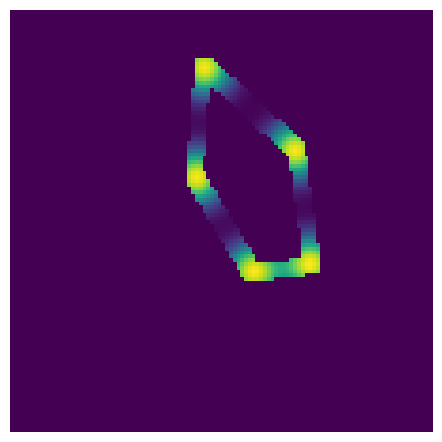

In [31]:
sample_gaussian_path = (
    f"{heatmaps_path}/gaussian/{os.listdir(f'{heatmaps_path}/gaussian')[0]}"
)
sample_gaussian_heatmap = torch.load(sample_gaussian_path)
show_n_channel_image_tensor(sample_gaussian_heatmap)